In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
def make_windows(df, seq_hours, pred_hours, step, factor, target):
    list_of_values = []
    train_df[target].rolling(window=factor*seq_hours+factor*pred_hours).apply(lambda x: list_of_values.append(x.values) or 0, raw=False)
    values = np.array(list_of_values[::step])
    X = pd.DataFrame(values[:,:factor*seq_hours])
    y = pd.DataFrame(values[:,factor*seq_hours:])
    
    return X, y

In [5]:
df = pd.read_csv('../data/torneo.csv')
#df.columns = ['date', 'time', 'demand']
#df['datetime'] = pd.to_datetime(df['date'].astype(str) + " " + df['time'].astype(str),format='%d/%m/%Y %H:%M')
df['datetime'] = pd.to_datetime(df['datetime'],format='%d/%m/%Y %H:%M:%S')
    
train_size = int(len(df)*0.7)
valid_size = int(len(df)*0.2)
test_size = int(len(df)*0.1)

train_df = df.iloc[:train_size,:]
test_df = df.iloc[-test_size:,:]

In [6]:
seq_hours = 12
pred_hours = 12
step = 6
target = 'co'

In [7]:
X, y = make_windows(train_df, seq_hours, pred_hours, step, 6, target)
X_test, y_test = make_windows(test_df, seq_hours, pred_hours, step, 6, target)

In [8]:
model = DecisionTreeRegressor(max_depth=10, random_state=0)
model.fit(X, y)
preds = model.predict(X_test)

mae = mean_absolute_error(preds, y_test)
mse = mean_squared_error(preds, y_test)
rmse = sqrt(mean_squared_error(preds, y_test))
print(mae, mse, rmse)

111.03609699792561 22321.19346071876 149.40278933379645


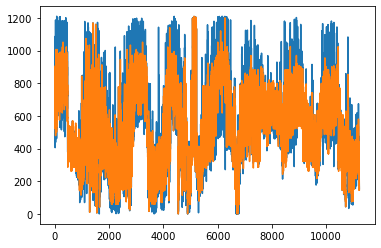

In [9]:
y_test.iloc[:,0].plot()
plt.plot(preds[:, 0])